In [29]:
# Install lazypredict if the internet is enabled
try:
    import lazypredict
except ImportError:
    !pip install --quiet lazypredict


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, learning_curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pd.set_option("display.max_columns", 200)
plt.rcParams["figure.figsize"] = (7,5)

The "Id" variable doesn't provide any meaningful information for the data; it's equivalent to the index, so we'll drop this column.

In [48]:
import os




df = pd.read_csv("hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.29,0.81,0.00,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.27,0.80,0.00,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.27,0.80,0.00,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.29,0.75,0.00,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.29,0.75,0.00,0,1,1


In [32]:
df.shape
df.columns
df.isnull().sum()
df.info()
df.describe(include="all").head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0,17379,17379.00000,17379.000000,17379.000000,17379.000000,17379.00000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0,NaN,2.50164,0.502561,6.537775,11.546752,0.02877,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088


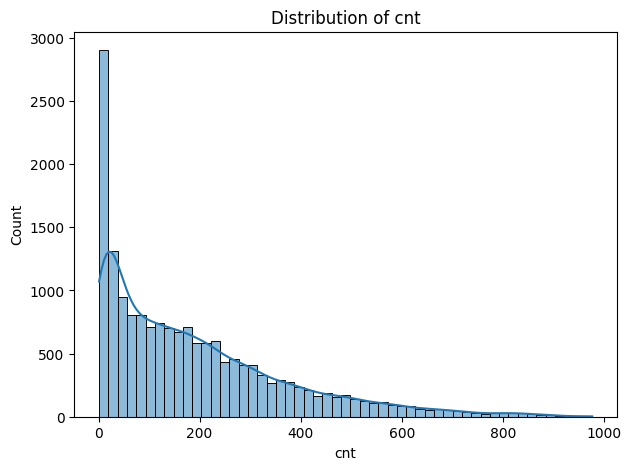

In [33]:
sns.histplot(df["cnt"], kde=True)
plt.title("Distribution of cnt")
plt.show()

In [34]:
df = df.drop(columns=["instant"])
df = df.drop(columns=["registered", "casual"])
if "dteday" in df.columns:
    df = df.drop(columns=["dteday"])

df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


# LOGISTIC REGRESSION

In [35]:
X = df.drop(columns=["cnt"])
y = df["cnt"]

cat_features = ["season","mnth","hr","weekday","weathersit"]
num_features = ["temp","atemp","hum","windspeed"]

# SUPPORT VECTOR CLASSIFIER

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=13
)

preprocessor = ColumnTransformer(transformers=[
    ("one_hot_encoder", OneHotEncoder(drop="first"), cat_features),
    ("standard_scaler", StandardScaler(), num_features)
], remainder="passthrough")

X_train_tf = preprocessor.fit_transform(X_train)
X_test_tf = preprocessor.transform(X_test)

# NAIVE BAYES

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_tf, y_train)

y_pred = tree_model.predict(X_test_tf)

print("R² score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² score: 0.8251400978474739
MAE: 45.902876869965475
MSE: 5888.345799769851


In [38]:
params = {
    "criterion" : ["squared_error", "friedman_mse"],
    "splitter" : ["best","random"],
    "max_depth" : [5,10,20,None],
    "min_samples_split" : [10,20,30],
    "min_samples_leaf" : [1,2,5,10]
}

In [39]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(
    estimator=DecisionTreeRegressor(),
    param_distributions=params,
    n_iter=50,
    cv=5,
    scoring="r2",
    n_jobs=-1,
    random_state=13
)
random.fit(X_train_tf, y_train)
y_pred_rand = random.predict(X_test_tf)

print("RandomizedSearchCV Best Params:", random.best_params_)
print("R²:", r2_score(y_test, y_pred_rand))
print("MAE:", mean_absolute_error(y_test, y_pred_rand))
print("MSE:", mean_squared_error(y_test, y_pred_rand))

RandomizedSearchCV Best Params: {'splitter': 'random', 'min_samples_split': 30, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'squared_error'}
R²: 0.8535396741689857
MAE: 42.91784863793396
MSE: 4932.000040167689


In [40]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)
grid.fit(X_train_tf, y_train)
y_pred_grid = grid.predict(X_test_tf)

print("GridSearchCV Best Params:", grid.best_params_)
print("R²:", r2_score(y_test, y_pred_grid))
print("MAE:", mean_absolute_error(y_test, y_pred_grid))
print("MSE:", mean_squared_error(y_test, y_pred_grid))

GridSearchCV Best Params: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20, 'splitter': 'random'}
R²: 0.8555635822653642
MAE: 41.85483450868815
MSE: 4863.845645754069


In [41]:
importances = grid.best_estimator_.feature_importances_
features = preprocessor.get_feature_names_out()

feat_imp = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)

print("Top 15 Features:")
for f, imp in feat_imp[:15]:
    print(f"{f}: {imp:.4f}")

Top 15 Features:
remainder__workingday: 0.1149
one_hot_encoder__hr_17: 0.0991
standard_scaler__temp: 0.0967
one_hot_encoder__hr_18: 0.0877
remainder__yr: 0.0800
standard_scaler__atemp: 0.0721
standard_scaler__hum: 0.0643
one_hot_encoder__hr_8: 0.0512
one_hot_encoder__hr_19: 0.0372
one_hot_encoder__hr_16: 0.0287
one_hot_encoder__hr_4: 0.0203
one_hot_encoder__hr_7: 0.0201
one_hot_encoder__hr_3: 0.0193
one_hot_encoder__season_4: 0.0185
one_hot_encoder__hr_1: 0.0179


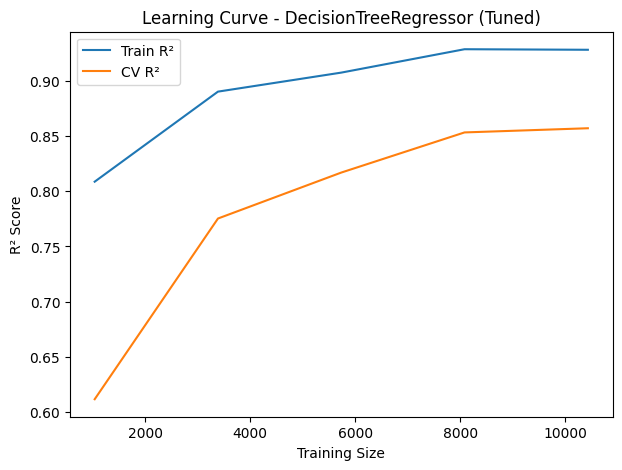

In [42]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_score, test_score = learning_curve(
    grid.best_estimator_,
    X_train_tf, y_train,
    cv=5,
    scoring="r2",
    n_jobs=-1
)
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, label="Train R²")
plt.plot(train_sizes, test_mean, label="CV R²")
plt.xlabel("Training Size")
plt.ylabel("R² Score")
plt.title("Learning Curve - DecisionTreeRegressor (Tuned)")
plt.legend()
plt.show()